In [1]:
!pip install tensorflow==2.8
#ctrl+enter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
#As of today, April 3rd, 2024, the most recent version of TensorFlow is 2.16.1.
#It was released on March 8th, 2024 [PIY package tensorflow].

#Here are some resources for you to learn more about TensorFlow versions:

#TensorFlow API Versions: https://www.tensorflow.org/versions
#TensorFlow Releases: https://github.com/tensorflow/tensorflow/releases

In [3]:
import keras as ks
ks.__version__

'2.8.0'

In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
# load the model
model = VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [7]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
!git clone https://github.com/suhas2071/images.git

Cloning into 'images'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 50
Receiving objects: 100% (53/53), 18.86 MiB | 38.62 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [9]:
# load an image from file
image = load_img('/content/images/f16.jpg', target_size=(224, 224))


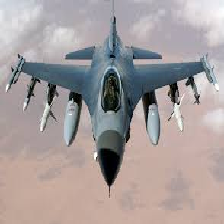

In [10]:
image

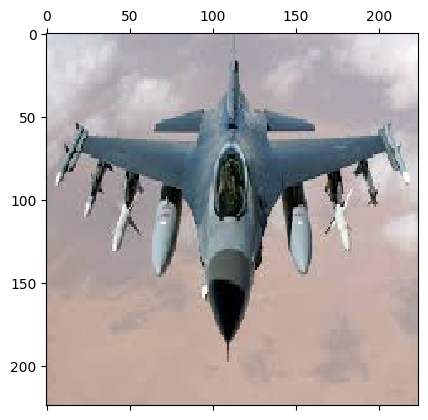

In [11]:
import matplotlib.pyplot as plt
plt.matshow(image)

In [12]:
# convert the image pixels to a numpy array
image = img_to_array(image)

In [13]:
image.shape

(224, 224, 3)

In [14]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [15]:
image.shape

(1, 224, 224, 3)

In [16]:
# prepare the image for the VGG model
image = preprocess_input(image)

In [17]:
# predict the probability across all output classes
yhat = model.predict(image)

In [18]:
yhat

array([[4.65072558e-09, 1.66938481e-08, 1.13091564e-05, 4.13331691e-06,
        6.29855913e-06, 1.38294487e-08, 2.10218527e-08, 4.43200143e-09,
        2.41666021e-10, 4.19489249e-10, 1.84533555e-09, 9.50164125e-09,
        5.44392176e-09, 5.89109028e-09, 3.32886296e-09, 8.07806710e-10,
        2.32466113e-09, 2.31443824e-08, 1.66532050e-08, 1.00296815e-09,
        9.51578372e-10, 2.30015098e-06, 1.60480109e-08, 2.20927078e-07,
        1.32306477e-09, 3.70110192e-11, 1.11683429e-09, 4.82172670e-11,
        8.16812520e-11, 1.06060251e-10, 2.09010503e-10, 4.54993335e-11,
        4.44118631e-11, 1.66700087e-09, 1.73175856e-08, 6.37162753e-11,
        4.94871533e-10, 1.62809748e-11, 1.01759302e-10, 1.05165654e-10,
        1.44644019e-10, 2.05972600e-11, 2.05107875e-10, 1.61879260e-11,
        9.40137811e-12, 1.91927533e-11, 1.07674585e-10, 1.35760278e-10,
        3.49428195e-11, 2.22514993e-11, 1.23200408e-10, 9.20225830e-07,
        5.22150205e-11, 6.42251946e-11, 8.40256337e-11, 1.150162

In [19]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
print(label)

49152/35363 [=========================================] - 0s 0us/step
[[('n04552348', 'warplane', 0.75265044), ('n02690373', 'airliner', 0.12890755), ('n04592741', 'wing', 0.081167884), ('n04008634', 'projectile', 0.019738736), ('n03773504', 'missile', 0.014020492)]]


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('/content/images/elephant.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
print(label)
# retrieve the most likely result, e.g. highest probability
#label = label[0][0]
# print the classification
#print('%s (%.2f%%)' % (label[1], label[2]*100))



[[('n01871265', 'tusker', 0.8043386), ('n02504013', 'Indian_elephant', 0.096963614), ('n02437312', 'Arabian_camel', 0.0664637), ('n02504458', 'African_elephant', 0.022799429), ('n02410509', 'bison', 0.0047589038)]]


In [20]:
# load an image from file
image = load_img('/content/images/zebra.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

zebra (99.80%)


In [ ]:
# load an image from file
image = load_img('/content/car.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

minivan (81.78%)


In [ ]:
# load an image from file
image = load_img('/content/missile.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

projectile (51.32%)
